## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

As a Data scientist with the  bank i need to build a neural network based classifier that can determine whether a customer will leave the bank or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer
 
* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location 
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer 
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary 

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values 
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [4]:
!pip install tensorflow==2.9.1

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [6]:
!pip install tensorflow

In [128]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('display.float_format', lambda x:'%.3f' % x) # to restrict the float values to 3 decimal places
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

## Loading the dataset

In [129]:
# importing the data
churn = pd.read_csv('C:\\Users\\user\\Downloads\\Churn.csv')

In [130]:
# let's create a copy of the data
data = churn.copy()

### View the first and last 5 rows of the dataset.

In [33]:
# checking for the top 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [34]:
# checking for the bottom 5 rows
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


- There seems not to be any missing value
- we have 3 object datatype columns, some other columns with categorical values and some int and float datatype values

### Understand the shape of the dataset

In [35]:
#checking for the number of rows and columns
data.shape

(10000, 14)

- the dataset has 10,000 rows and 14 columns

### Check the data types of the columns for the dataset

In [36]:
# checking for the datatype, memory  and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- from the above details, we have 10,000 rows and 14 columns
- RowNumber and CustomerID may not add much values to analysis and model building, therefore we need to drop them in the later
- we have 3 objects datatype, 9 int64 datatype, 2 float64 and 1.1+ MB memory usage
- Object datatype can be converted into categorical values for model building and to reduce memory usage

### Checking the Statistical Summary

In [37]:
#checking for the statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


- RowNumber and Customerid are unique columns and would need to be dropped because they may not add much value to us
- Creditscore column has min of 350, average of 650.53 and max of 850
- Age column has min of 18, average of 39, and max of 92
- Tenure column has min of 0.000, average of 5, max of 10
- Balance column has min 0.000, average of 76485.9, and 250898.1. possiblity of having outliers
- NumOfProduct column has min of 1, average of 2 and max of 4
- EstimatedSalary column has min of 11.6, average of 100090.240 and max of 199992.480 with tendercy of outliers 
- Columns Hascrcard, Isactivemember and Exited are all categorical variables.

In [38]:
 # checking for the statistical summary of the dataset in terms of the objects
data.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


- from the column of Gender, Male has the most values or count with 5457
- in column Geography, France is the most frequent location with 5014
- Same with Surname, that has Smith as it most count

In [49]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

- 7963 customers did not leave the bank in last six Months
- 2037 customers left the bank in the last six Months

In [39]:
# checking for unique values and categorical variables
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
McEncroe     1
Caraway      1
Patrick      1
Greeves      1
Salmond      1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


In [40]:
### Checking for unique values for each of the column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- RowNumber and CustomerId have same unique numbers and may not be that useful for our analysis and model, so we would drop them
- We have 3 categorical variables and 3 object datatype variables. Others are either float and int variables
- Gender column has 2
- Geograpghy has 3
- Numofproduct has 4 different product types

In [41]:
### Checking for Missing Values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- There are no missing values in the dataset

In [42]:
# checking for duplicates in the dataset
data.duplicated().sum()

0

- No duplicated values

In [43]:
data1 = data.copy()

### Data Pre-processing

### Droping the columns which are unique for all users like  CustomerID, Surname, and Rownumbers

In [44]:
# RowNumber, CustomerId and Surname are unique hence drop them and hence will not add value to the modeling
data.drop(["RowNumber", "CustomerId", "Surname" ], axis=1, inplace=True)

In [45]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [114]:
data.shape

(10000, 11)

- Columns Rownumber, Customerid and Surname have been dropped.

In [52]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Exploratory Data Analysis

### Univariate Analysis

In [50]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on CreditScore

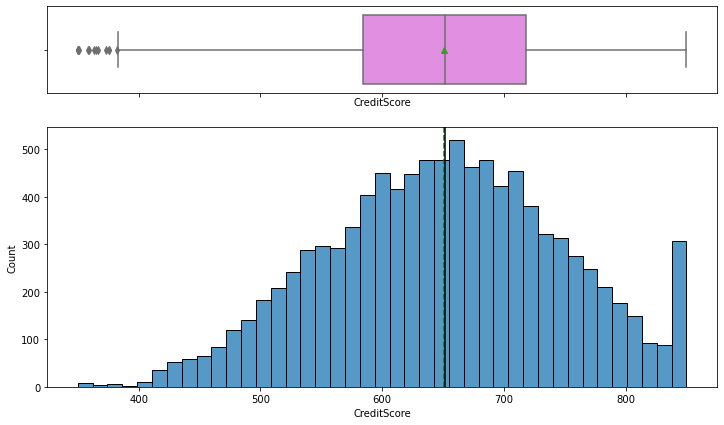

In [53]:
# ploting the histogram of CreditScore
histogram_boxplot(data,'CreditScore')

- From the plot above of Creditscore, the data is skewed to the left
- It has a few outliers to the left side below 400
- It is bell-shaped
- Both the mean and median are around 650
- Most of the data is between 600 and 700
- 660 has the highest count of above 500

#### Observations on Age

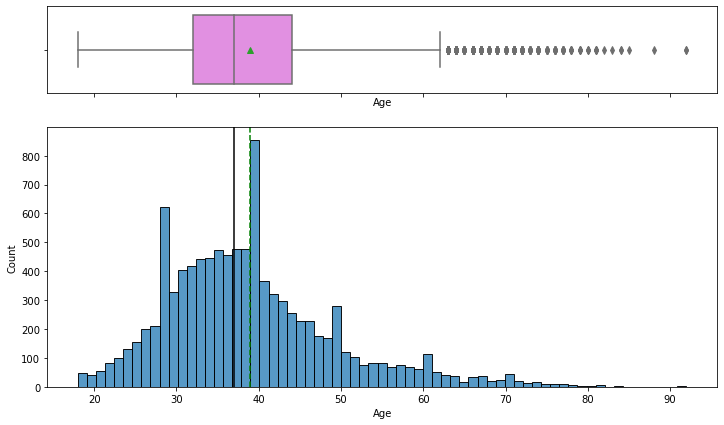

In [54]:
# ploting the histogram of Age
histogram_boxplot(data,'Age')

- From the column of Age, it is right skewed
- alot of outliers on the right side of the data even above age 90
- the mean and the median are within similiar value of 38
- Most of the values are between age 30 to 40
- 40 has the highest count of above 800
- Customers with the ages of 30 to 50 should be given more attention

#### Observations on Balance

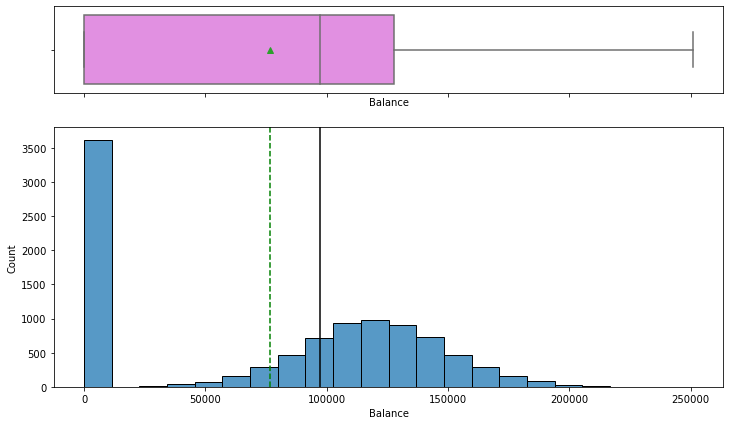

In [55]:
# ploting the histogram of Balance
histogram_boxplot(data,'Balance')

- From the column of Balance, the data is skewed to the right
- No outliers to both ends
- The median is around 98000
- The mean is around 75000
- Most of the balance are within 100,000 to 150,000
- balance of 0 has the highest count of above 3500 customers
- More attention should be given to customers with balance between 100,000 to 150,000

#### Observations on Estimated Salary

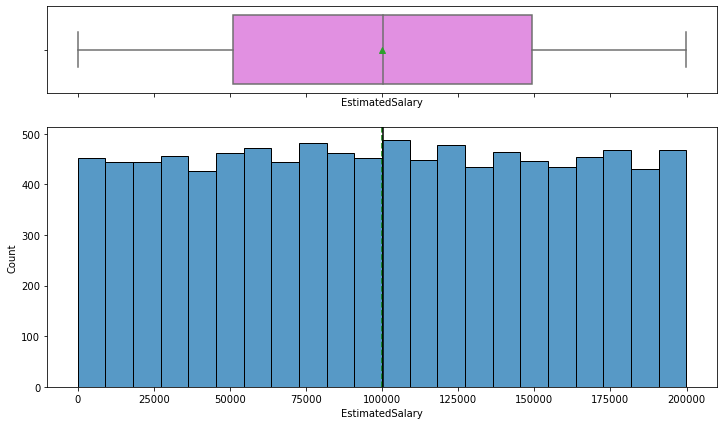

In [56]:
# ploting the histogram of Estimated
histogram_boxplot(data,'EstimatedSalary')

- From the column of Estimated Salary, the data normally/symmetrically distributed
- No outliers
- Both mean and median are on the same value of 100,000. the average extimated salary is within 100,000
- The minimum Estimated salary is 0 and the maximum salary is approximately 200,000

In [51]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Exited

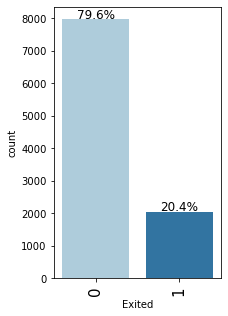

In [57]:
# ckecking for the labeled barplot of Exited
labeled_barplot(data, "Exited", perc=True)

- 79.6% of the customers did not leave the bank
- 0nly 20.4% of the customers that left the bank

#### Observations on Geography

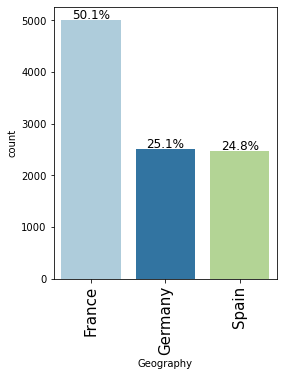

In [58]:
# ckecking for the labeled barplot of Geography
labeled_barplot(data, "Geography", perc=True)

- Most of the customes are located in France with about 50.1%
- Germany and Spain are within the range approximately 25%, half of France customer base
- therefore, more attention should be channelled towards customers in France

#### Observations on Gender

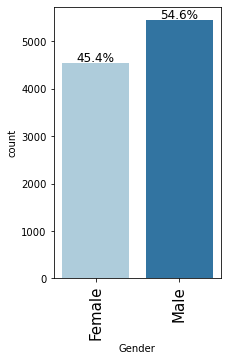

In [60]:
# ckecking for the labeled barplot of Gender
labeled_barplot(data, "Gender", perc=True)

- Most of the customers are Male with count of 54.6% above 5000
- Next is Female with count of 45.4% below 5000
- Target should be tuned towards the Male customers too

#### Observations on Tenure

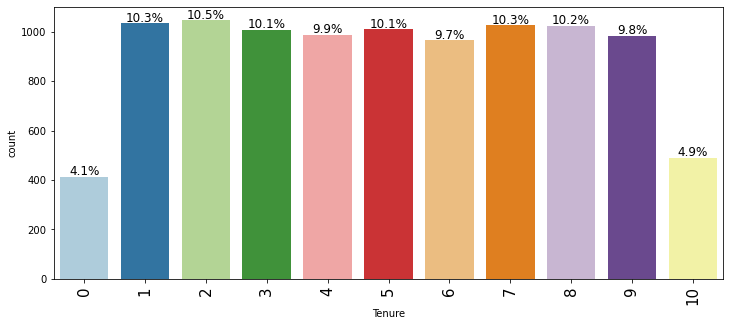

In [61]:
# ckecking for the labeled barplot of Tenure
labeled_barplot(data, "Tenure", perc=True)

- From the column of Tenure, Tenure 1 to tenure 9 are within similar range of approximately 10%
- Tenure 0 and 10 are within the similar ranges of 4 to 5%

#### Observations on Number of Products

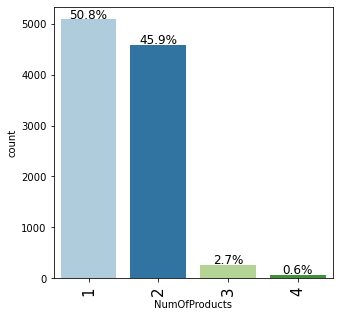

In [62]:
# ckecking for the labeled barplot of Number of Products
labeled_barplot(data, "NumOfProducts", perc=True)

- From the column of Number of Products, most of the customers use between 1 and 2 products of 50.8% and 45.9% respectively
- the customers that use between 3 and 4 products are very few, less than 3%
- Customers that only use 1 or 2 products are like to churn the bank, attention should be given to customers that use 1 or 2 products to avoid churning
- More attention and policy to should considered for customers that use 3 or 4 products in order to retain them and grow them more


#### Observations on Has Credit Card

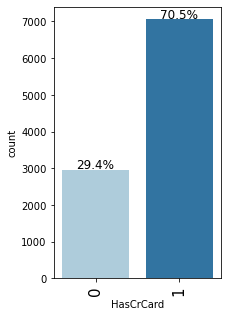

In [63]:
# ckecking for the labeled barplot of Number of Credit Card
labeled_barplot(data, "HasCrCard", perc=True)

- From the column of customers that have crdit card, 70.5% of the customers have credit card
- Only 29.4% of customers that do not have credit card
- Customers without credit card are like to churn the bank which is about 29.4%
- Policies and priorities should be structured towards customers that do not have credit cards and to make them stay

#### Observations on Is Active Member

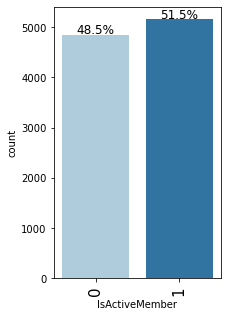

In [64]:
# ckecking for the labeled barplot of Active members
labeled_barplot(data, "IsActiveMember", perc=True)

- From the above plot, Both Active and inactive members are almost on the same range
- From the column of Active members, 51.5% are active and 48.55 are not active
- The number of Inactive members need to be reduced, because they are likely to churn the bank
- surveys of enquiries should be sent to the inactive members for feed sake

### Bivariate Analysis

In [69]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [70]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

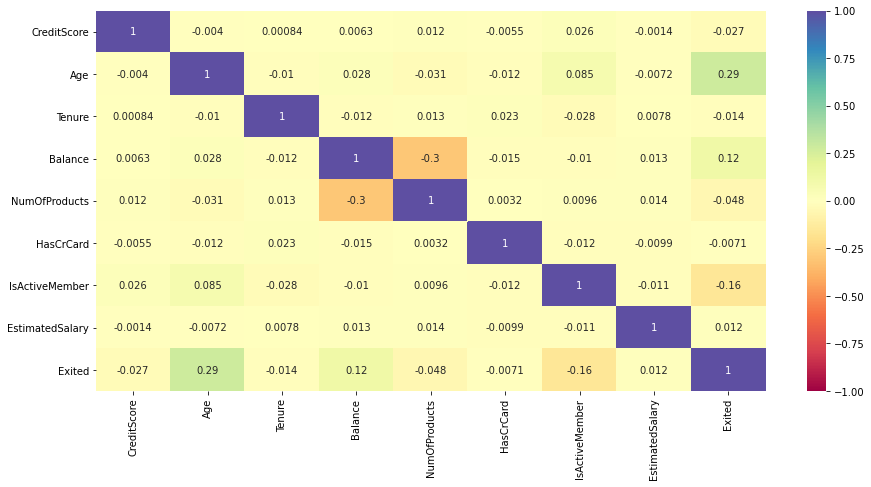

In [71]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

- From the heatmap above, Age is positively correlated with Exited. Meaning as the customer advances in age, the customer would exit the bank
- As the customer balance increases, the likeliness that the customer would exit the bank. positively correlated
- As the customer account balance increases, the number of products used decreases. Negatively correlated.
- So applies to the rest columns wrt to negative correlations
- Customers with increasing account balance and that uses fewer number of products likely would churn the bank.
- Customers that not active are likely to exit the bank.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


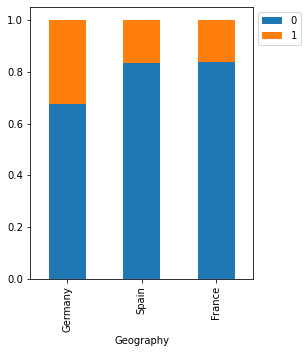

In [73]:
# checking for the stacked plot between Geography and Exited
stacked_barplot(data, "Geography", "Exited" )

- From the above plot, Germany has the most customers that have the tendercy to exit the bank.
- Spain and France are within range of customers that have high tendercy of not exiting the bank
- Therefore, more attentions and strategic policies should be made that would focus on the customers in spain and France most expecially customers in Germany in order to retain them and reduce their possibilities of exiting the bank


#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


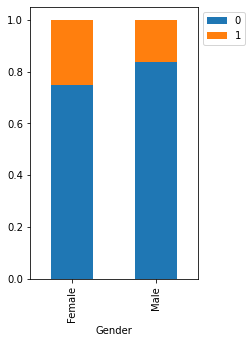

In [74]:
# checking for the stacked plot between Gender and Exited
stacked_barplot(data, "Gender", "Exited" )

- From the above plot, The Female customers have more possibilities of leaving or exiting the bank
- Even though the men are more than the Female customers, yet more priority policies for the Female customers should be developed and deployed in order to prevent churning the bank.
- More priorities and strategic policies should be developed about how to retain and increase the number of Female customers and how to retain them.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


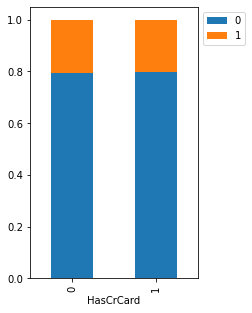

In [77]:
# checking for the stacked plot between Customers that have credit card and Exited
stacked_barplot(data, "HasCrCard", "Exited" )

- From the above plot, the column of customers that have credit card has little or no information as to deciding churning or exiting the bank

In [78]:
#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


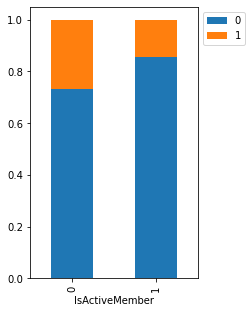

In [79]:
# checking for the stacked plot between Customers that are active card and Exited
stacked_barplot(data, "IsActiveMember", "Exited" )

- From the plot above, customers that are inactive are more than active members and are more likely to churn or exit the bank
- Therefore, surveys should be sents to the inactive members to get there feedbacks so as to develop ploicies and strategies that would engage the customers and keep them active and prevent them from churning/exiting the bank.

#### Exited Vs Credit Score

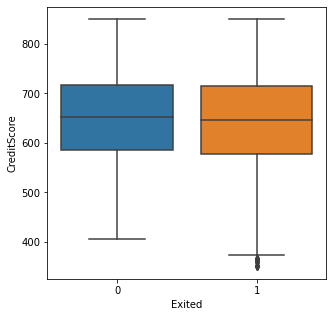

In [82]:
# checking the boxplot of Creditscore and Exited
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=data)
plt.show()

- From the plot above, customers with creditscore lower than 400 are likely to churn or exit the bank
- The customers with lower creditscore and with outliers lower than 400 are likely to churn/exit the bank
- More strategies and policies should be developed and deployed in order to encourage customers with credit scores from 400 and below to get more credit scores for the purpose of keeping the customers and preventing them from churning/exiting the bank


#### Exited Vs Age

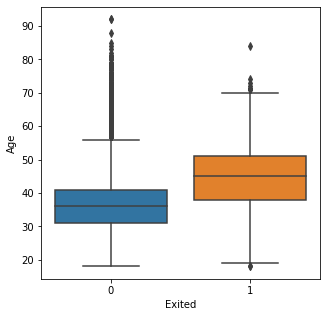

In [83]:
# checking the boxplot of Age and Exited
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=data)
plt.show()

- From the above plot, customers below 18 years are like to churn/exit the bank
- Cutomers from above 45 years are likely to exit the bank, most especially as the customers get older between 70 to 85 years
- More products, marketing strategies and policies should be built targeting the elderly customers and the younger customers including some retirement products/packages.
- sustainable products strategies should be develop between the older-exiting customers and their family members for continuity and sustainability

#### Exited Vs Tenure

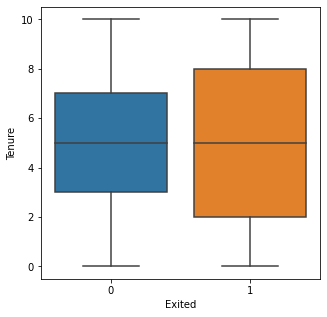

In [84]:
# checking the boxplot of Tenure and Exited
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=data)
plt.show()

- From the plot above, customers that have stayed with the bank for a long time are most likely to exit the bank.
- Customers, that have been with the bank up to 3 year and more are likely to exit the bank
- The longer the customers stayed with the bank, the more likely they would exit the bank
- Older customers should be given some sense of belonging or insentives that would encourage them not to exit the bank

#### Exited Vs Balance

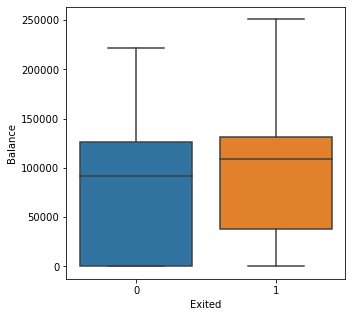

In [85]:
# checking the boxplot of Balance and Exited
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=data)
plt.show()

- From the plot above, customers with account balance from 5000 and above are likely to exit the bank
- The more the account balance, the likely the customer churn/exit the bank
- More strategies, attractive marketing policies and products should be developed for the customers that have from 5000 and above balance in order to prevent churning/exiting the bank
- As a strategy, customers with more account balance priorities should be given to them to prevent exiting the bank

#### Exited Vs Number of Products

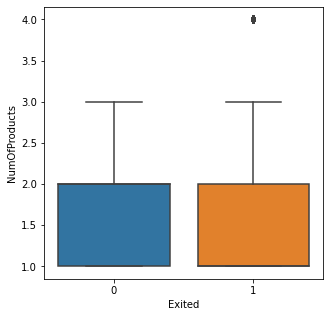

In [86]:
# checking the boxplot of Number of Product and Exited
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=data)
plt.show()

- From the plot above, no much information about if the customer would exit
- Although, customers that use up to 4 of the bank's product are likely to exit
- Surveys should be shared with customers to get their feedbacks so as to develop more strategic products that would encourage the customers to not churn or exit the bank.

#### Exited Vs Estimated Salary

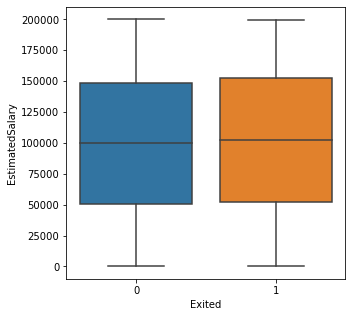

In [87]:
# checking the boxplot of Number of Estimated Salary and Exited
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data)
plt.show()

- From the plot above, both are of equal values and do not tend to give us significant information about our target

In [88]:
data2 = data.copy()

In [107]:
data3 = data2.copy()

## Data Preprocessing

### Data Preparation for Modeling

In [149]:
data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [113]:
data.shape

(10000, 11)

In [150]:
## Separating Independent and Dependent Columns
X = data2.drop(['Exited'],axis=1)
Y = data2[['Exited']]

In [151]:
# Splitting the dataset into the Training and Testing set.

X_temp, X_test, y_temp, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [152]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp, test_size = 0.2, random_state = 42,stratify=y_temp, shuffle = True)

In [153]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3006,747,France,Female,45,1,114959.120,1,1,0,189362.390
5735,585,Spain,Female,44,4,0.000,2,0,1,101728.460
5652,691,France,Female,29,9,0.000,2,0,0,199635.930
26,756,Germany,Male,36,2,136815.640,1,1,1,170041.950
3596,643,France,Male,36,0,148159.710,1,0,0,55835.660


- From the table above, Exited has been dropped from the independant variable

In [155]:
data3 = data2.copy()

In [156]:
data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


**Create dummy variables for string type variables**

**Categorical Encoding**

In [157]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True) 
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)  
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

In [159]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,747,45,1,114959.120,1,1,0,189362.390,0,0,0
5735,585,44,4,0.000,2,0,1,101728.460,0,1,0
5652,691,29,9,0.000,2,0,0,199635.930,0,0,0
26,756,36,2,136815.640,1,1,1,170041.950,1,0,1
3596,643,36,0,148159.710,1,0,0,55835.660,0,0,1


In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 3006 to 1558
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6400 non-null   int64  
 1   Age                6400 non-null   int64  
 2   Tenure             6400 non-null   int64  
 3   Balance            6400 non-null   float64
 4   NumOfProducts      6400 non-null   int64  
 5   HasCrCard          6400 non-null   int64  
 6   IsActiveMember     6400 non-null   int64  
 7   EstimatedSalary    6400 non-null   float64
 8   Geography_Germany  6400 non-null   uint8  
 9   Geography_Spain    6400 non-null   uint8  
 10  Gender_Male        6400 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 468.8 KB


- All the variables of Object data type have been converted to categorical variables to be useful for the model building

**Normalize the numerical data**

In [162]:
## Normalizing/ scaling the Numerical data in x_train, x_test and x_validate
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [163]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6400, 11)
(1600, 11)
(6400, 1)
(1600, 1)
(2000, 11)
(2000, 1)


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers. 

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Plotting the confusion matrix**



In [165]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

### Model Building: Neural Network

In [166]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [173]:
# Initializing the ANN
classifier = Sequential()

# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))

#Add 1st hidden layer
classifier.add(Dense(32, activation='relu'))

# Adding the output layer 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [174]:
# Create optimizer with default learning rate
# Compile the model
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [175]:
# checking for the summary of the model/classifier
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                768       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [177]:
history=classifier.fit(X_train, y_train,           
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5287 - accuracy: 0.7933 - val_loss: 0.4907 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7962 - val_loss: 0.4738 - val_accuracy: 0.7962
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7964 - val_loss: 0.4617 - val_accuracy: 0.7956
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7973 - val_loss: 0.4530 - val_accuracy: 0.7944
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7947 - val_loss: 0.4465 - val_accuracy: 0.7962
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7961 - val_loss: 0.4417 - val_accuracy: 0.7994
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.8012 - val_loss: 0.4379 - val_accuracy: 0.8019

**Loss function**

63/63 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8515


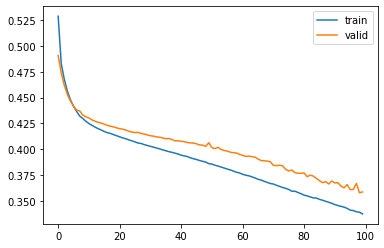

In [179]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = classifier.evaluate(X_test, y_test)

- There seem to be some distortions and noise in the validation dataset
- there is an increasing gap between the training and validation datasets
- The loss function tends to increase wider between the train and validation data as the number of epochs increases


**Confusion matrix** 

In [180]:
y_pred1=classifier.predict(X_val)
y_pred1 = (y_pred1 > 0.5)
y_pred1

50/50 [==============================] - 1s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

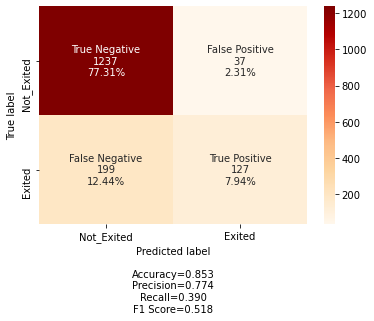

In [183]:
#Calculating the confusion matrix 
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='OrRd')

- False Negative is somehow high at 12.44%
- I need to minimize the FN and maximize the Recall value
- Recall score is very low at 0.390. Need to increase the recall scores by reducing the value for False Negative

### Model Building: Neural Network model with Adam Optimizer

In [184]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [186]:
def create_model():
      ## Initializing the ANN
      model = Sequential()

      #Adding the input, hidden and output layers
      model.add(Dense(64, activation='relu',input_dim = X_train.shape[1]))

      model.add(Dense(32,activation='relu'))

      model.add(Dense(1, activation = 'sigmoid'))
      
      ##Compiling the ANN with Adam optimizer and binary cross entropy loss function
      optimizer = tf.keras.optimizers.Adam(0.001)                                        

      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [187]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [188]:
# checking for the fitting of the model
history = model.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.8052 - val_loss: 0.4346 - val_accuracy: 0.8094
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8238 - val_loss: 0.4208 - val_accuracy: 0.8169
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8286 - val_loss: 0.4144 - val_accuracy: 0.8275
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8323 - val_loss: 0.4151 - val_accuracy: 0.8181
Epoch 5/100
200/200 [==============================] - 1s 2ms/step - loss: 0.3852 - accuracy: 0.8370 - val_loss: 0.4026 - val_accuracy: 0.8331
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3772 - accuracy: 0.8431 - val_loss: 0.3932 - val_accuracy: 0.8388
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8445 - val_loss: 0.3815 - val_accuracy: 0.8431

**Loss function**

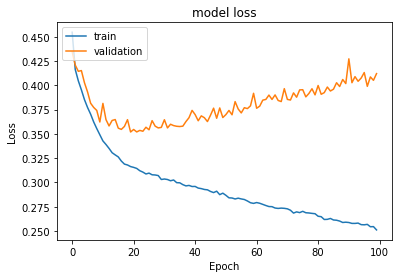

In [189]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- The model is overfitting
- The loss function gap has drastically increased as i introduced Adam optimizer at lr(0.001)
- The Learning rate seems to affect the validation data
- there seems to be some level of imbalance and distortion in the validation data

### Introducing more hyperparameters like Earlystopping

In [193]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

#calling the create model function
model_e = create_model()

# Fitting the model on train and validation with 50 epochs
history_e = model_e.fit(X_train, y_train,batch_size=32, validation_data=(X_val, y_val), epochs=100,verbose=1,callbacks=es_cb)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4664 - accuracy: 0.7841 - val_loss: 0.4318 - val_accuracy: 0.8112
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8225 - val_loss: 0.4224 - val_accuracy: 0.8194
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8314 - val_loss: 0.4133 - val_accuracy: 0.8331
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8364 - val_loss: 0.4146 - val_accuracy: 0.8263
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8370 - val_loss: 0.4042 - val_accuracy: 0.8338
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8436 - val_loss: 0.3917 - val_accuracy: 0.8462
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8494 - val_loss: 0.3778 - val_accuracy: 0.8487

- At Epoch 18/100 , train loss is 0.3124 and accuracy is 0.87. val_loss is 0.3558 and val_accuracy is 0.86

**Loss function**

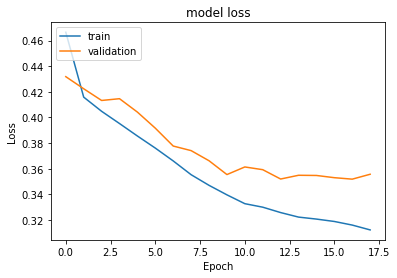

In [194]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- From the plot above for the loss function after i introduced earlystopping, the loss function gap has reduced very well, much more than the previous plot but not as good as the first model
- Although they is still some level of overfitting in the model
- the validation still has some noise or imbalance in the dataset
- it appears that as the epoch increases, the loss also increases.

### Tuning the threshold using ROC-AUC

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.169048, G-Mean=0.810


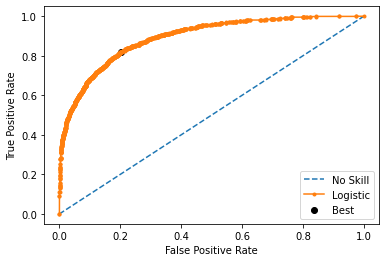

In [195]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [196]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [197]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.49      0.76      0.60       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.79      0.81      1600



- Recall has increase, meaning the False Negative has reduced more

**Confusion matrix**

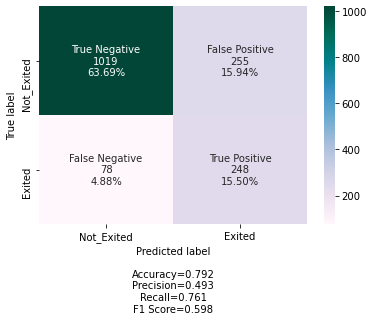

In [199]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='PuBuGn')

- From the plot above after tuning the threshold using AUC/ROC, the value for False Negative has reduced to 4.88% unlike the first model
- The Recall value has improved to 0.761 and accuracy too to 0.792
- This model is getting better than the previous

### Model Improvement: Neural Network model with Dropout

In [200]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [201]:
#Initializing ANN
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Adding dropout
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

#Adding dropout
model_3.add(Dropout(0.1))

# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid')

In [202]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

- This time, i am adding dropout to fine tune the model more

In [203]:
# Initialize the ANN with optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compiling the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [204]:
#Fitting the ANN with batch_size = 32 and 100 epochs 
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 0.7983 - val_loss: 0.4415 - val_accuracy: 0.8012
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4408 - accuracy: 0.8045 - val_loss: 0.4283 - val_accuracy: 0.8069
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.8127 - val_loss: 0.4229 - val_accuracy: 0.8188
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.8127 - val_loss: 0.4201 - val_accuracy: 0.8250
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4202 - accuracy: 0.8216 - val_loss: 0.4146 - val_accuracy: 0.8213
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4220 - accuracy: 0.8183 - val_loss: 0.4112 - val_accuracy: 0.8250
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4137 - accuracy: 0.8220 - val_loss: 0.4079 - val_accuracy: 0.8300

**Loss function**

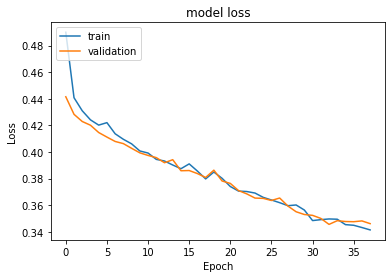

In [205]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- After introducing the dropout function of 0.2 and 0.1 at the after the input layer and the first hidden layer respectly, the model is not overfitting
- The loss function has reduced very well
- Both the validation and train data set are intertwinning , therefore closing the gap of the loss function
- The model seems to be generalizing much better now.

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.197977, G-Mean=0.794


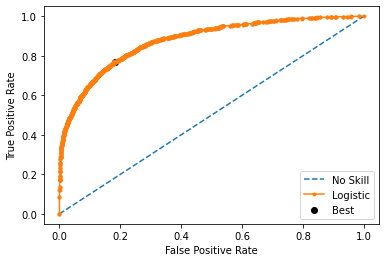

In [206]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

- Best Threshold is 0.198 and gmean is 0.794

**Predict the results using  the best  threshold**

In [207]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [208]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1274
           1       0.51      0.74      0.60       326

    accuracy                           0.80      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.80      0.81      1600



### creating confusion metrix

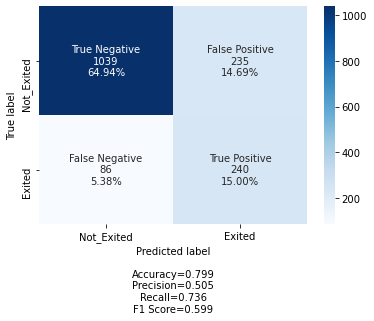

In [209]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- Recall has reduced to 0.736 from 0.761
- Accuracy has slightly increase from 0.792 to 0.799
- False Negative has increased to 5.38% from 4.88%
- This model is generalizing but not as well as the previous model

### Model Improvement: Neural Network model with Hyperparameter tuning

In [210]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [211]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):  
    np.random.seed(1337)

    #Initializing the ANN
    model = Sequential()

    #Adding the input layer
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    #Adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # Adding the hidden layer
    model.add(Dense(layer_2,activation='relu'))

    #Adding the output layer
    model.add(Dense(1, activation='sigmoid'))

    #Adding Adam initializer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    #compiling the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

### Using Grid search to introduce Batch size and Epochs

In [216]:
## Calling the create_model_v2 function
keras_estimator = KerasClassifier(build_fn= create_model_v2, verbose=1)

In [217]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator= keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [219]:
## Fitting the model on train data and validation data
grid_result = grid.fit(X_train, y_train, validation_data = (X_val,y_val),verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean 
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 1s 4ms/step - loss: 0.4588 - accuracy: 0.8017 - val_loss: 0.4299 - val_accuracy: 0.8056
Best: 0.817969 using {'batch_size': 64, 'lr': 0.01}


- For this model fitting 3 folds for 9 candidates, totalling 27 fits. Out of 100 epochs, Batch size of 64 and earning rate of 0.01 at best if 0.817969

**creating the final model with the obtained configuration after hyperparameter tuning**

In [220]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [223]:
## Creating the fit for the model on train data and train the model with best params
history_h=estimator_v2.fit(X_train,y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 0.4593 - accuracy: 0.7998 - val_loss: 0.4288 - val_accuracy: 0.8138
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.8220 - val_loss: 0.4115 - val_accuracy: 0.8256
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8300 - val_loss: 0.4078 - val_accuracy: 0.8263
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.8320 - val_loss: 0.4031 - val_accuracy: 0.8325
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4015 - accuracy: 0.8380 - val_loss: 0.3937 - val_accuracy: 0.8313
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8397 - val_loss: 0.3689 - val_accuracy: 0.8512
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8447 - val_loss: 0.3668 - val_accuracy: 0.8481

**Loss function**

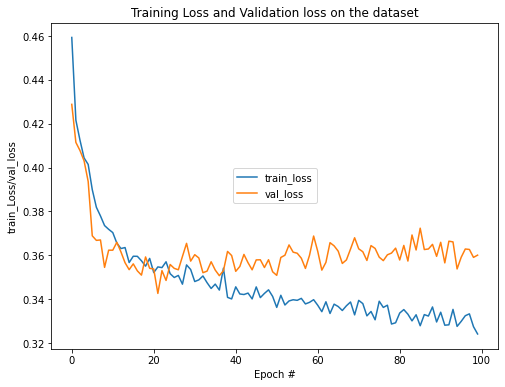

In [224]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

- From the plot above after adding the batch size, presense of noise, some level of distortion and the training data is overfitting and has some imbalance dataset
- The loss function has increased in gap as the epoch increases
- this model doesnt generalizes 

**Threshold**

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.230724, G-Mean=0.813


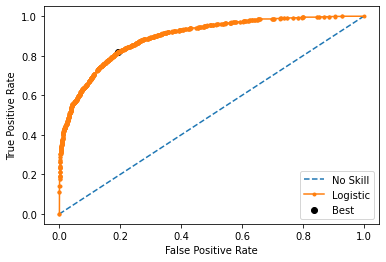

In [225]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

- Best Threshold has increased from Threshold=0.197977, G-Mean=0.794 to 0.230724 and gmean to 0.813

**Predict the results using  the best  threshold**

In [226]:
# Predicting the result of the best threshold
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 2ms/step
[[0.13304731]
 [0.00305856]
 [0.02852563]
 ...
 [0.19741079]
 [0.46882552]
 [0.45529923]]


In [227]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


**Classification report**

In [228]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1274
           1       0.48      0.74      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.77      0.72      1600
weighted avg       0.83      0.78      0.80      1600



### Confusion Metrix

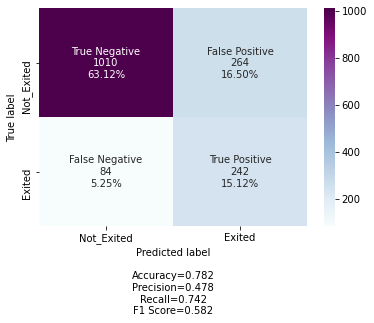

In [233]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm_h=confusion_matrix(y_val, y_pred_h)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='BuPu')

- From the plot above, Recall has slightly increased from 0.736 to 0.742
- False Negative has slightly reduced from 5.38% to 5.25%
- Accuracy has also slightly decrease from 0.799 to 0.782 

### Model Improvement: Neural Network model with balanced data

**Apply SMOTE to balance this dataset.**

### SMOTE + Keras Tuner

In [241]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



In [243]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [246]:
#Initializing ANN
model_4 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Adding dropout
model_4.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_4.add(Dense(16,activation='relu'))

#Adding dropout
model_4.add(Dropout(0.1))

# Adding the second hidden layer with 8 neurons with relu as activation functions
model_4.add(Dense(8,activation='relu'))

# Adding the output layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [247]:
# Summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [248]:
# Defining earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compiling the model
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model after Early stopping
history_4 = model_4.fit(X_train, y_train,batch_size= 64, epochs=100, verbose=1, validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 4ms/step - loss: 0.6456 - accuracy: 0.6349 - val_loss: 0.5489 - val_accuracy: 0.7500
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5742 - accuracy: 0.7109 - val_loss: 0.5080 - val_accuracy: 0.7581
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7281 - val_loss: 0.5501 - val_accuracy: 0.7144
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5420 - accuracy: 0.7346 - val_loss: 0.5300 - val_accuracy: 0.7275
Epoch 5/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5338 - accuracy: 0.7365 - val_loss: 0.5101 - val_accuracy: 0.7444
Epoch 6/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5260 - accuracy: 0.7410 - val_loss: 0.5303 - val_accuracy: 0.7262
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5179 - accuracy: 0.7470 - val_loss: 0.4972 - val_accuracy: 0.7644

**Loss function**

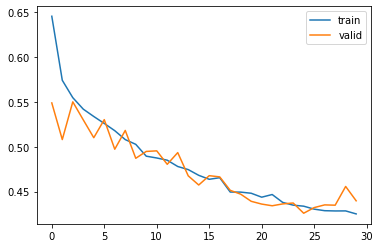

In [249]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

- From the plot above, both the validation and train data are intertwining but the model is overfitting
- The training data is not smooth, has some imbalance data and distortion mostly on the validate data

**Finding the optimal  threshold**

319/319 [==============================] - 1s 1ms/step
Best Threshold=0.489017, G-Mean=0.823


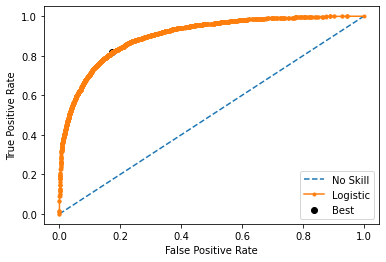

In [250]:
## Finding the optimal threshold using X_train
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [251]:
## The predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [252]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1274
           1       0.51      0.72      0.60       326

    accuracy                           0.80      1600
   macro avg       0.71      0.77      0.73      1600
weighted avg       0.84      0.80      0.81      1600



**Confusion matrix**

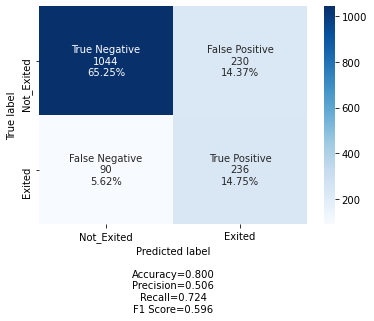

In [253]:
#Calculating the confusion matrix 
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- From the plot above, the Accuracy has increased to 0.800
- False Negative has increased to 5.62%
- Recall has reduced to 0.724 from 0.742

## Final Model

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.198872, G-Mean=0.821


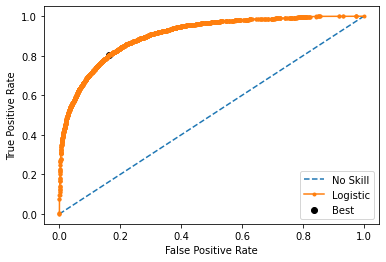

In [270]:
# predict probabilities using the best model
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [271]:
# Predicting the X_test data using the best model
y_pred_test = model_e.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


**Classification report**

In [272]:
## Classification report on y_test and the predicted values
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.51      0.72      0.60       407

    accuracy                           0.80      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



**Confusion report**

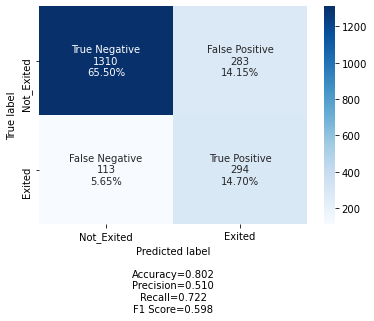

In [273]:
# Calculating the confusion matrix 
cm_h=confusion_matrix(y_test,y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- From the plot above with Test dataset, Recall is 0.722 from 0.761 with validation dataset
- Accuracy is 0.802 from 0.799 with validation dataset
- False Negative has the value of 5.65% from 5.38% with validation dataset
- This model is generalizing well with the dataset both on training and testing.
- More hyperparameters can be used to fine tuned this model further.

## Actionable Insights and Business Recommendations

- Surveys should be shared with customers to get their feedbacks so as to develop more strategic products that would encourage the customers to not churn or exit the bank.

- More strategies, attractive marketing policies and products should be developed for the customers that have from 5000 and above balance in order to prevent churning/exiting the bank.

- As a strategy, customers with more account balance priorities should be given to them to prevent exiting the bank.

- Customers, that have been with the bank up to 3 year and more are likely to exit the bank.

- The longer the customers stayed with the bank, the more likely they would exit the bank.

- Older customers should be given some sense of belonging or insentives that would encourage them not to exit the bank.

- Cutomers from above 45 years are likely to exit the bank, most especially as the customers get older between 70 to 85 years.

- More products, marketing strategies and policies should be built targeting the elderly customers and the younger customers including some retirement products/packages.

- sustainable products strategies should be develop between the older-exiting customers and their family members for continuity and sustainability.

- Customers with creditscore lower than 400 are likely to churn or exit the bank.

- The customers with lower creditscore and with outliers lower than 400 are likely to churn/exit the bank.

- More strategies and policies should be developed and deployed in order to encourage customers with credit scores from 400 and below to get more credit scores for the purpose of keeping the customers and preventing them from churning/exiting the bank.

- Therefore, surveys should be sents to the inactive members to get there feedbacks so as to develop ploicies and strategies that would engage the customers and keep them active and prevent them from churning/exiting the bank.

- Even though the men are more than the Female customers, yet more priority policies for the Female customers should be developed and deployed in order to prevent churning the bank.

- More priorities and strategic policies should be developed about how to retain and increase the number of Female customers and how to retain them.

- Spain and France are within range of customers that have high tendercy of not exiting the bank.

- Therefore, more attentions and strategic policies should be made that would focus on the customers in spain and France most expecially customers in Germany in order to retain them and reduce their possibilities of exiting the bank.
